In [128]:
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import mannwhitneyu

In [129]:
data = pd.read_csv('data/result.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(data.loc[data['Category'] == 'others'].index)

data

,Category,Language,Lib,Year,Month,NewCommers
0,data-science,python,NumPy,2009,1,0
1,data-science,python,NumPy,2009,2,0
2,data-science,python,NumPy,2009,3,0
3,data-science,python,NumPy,2009,4,0
4,data-science,python,NumPy,2009,5,0
...,...,...,...,...,...,...
9715,data-science,r,beepr,2017,8,1
9716,data-science,r,beepr,2017,9,1
9717,data-science,r,beepr,2017,10,0
9718,data-science,r,beepr,2017,11,0


In [130]:
dataPython = data.loc[data['Language'] == 'python', 'NewCommers'].sum()
dataR = data.loc[data['Language'] == 'r', 'NewCommers'].sum()

In [131]:
dataAllPython = data.loc[(data['Category'] == 'data-science') & (data['Language'] == 'python')]
dataAllR = data.loc[(data['Category'] == 'data-science') & (data['Language'] == 'r')]

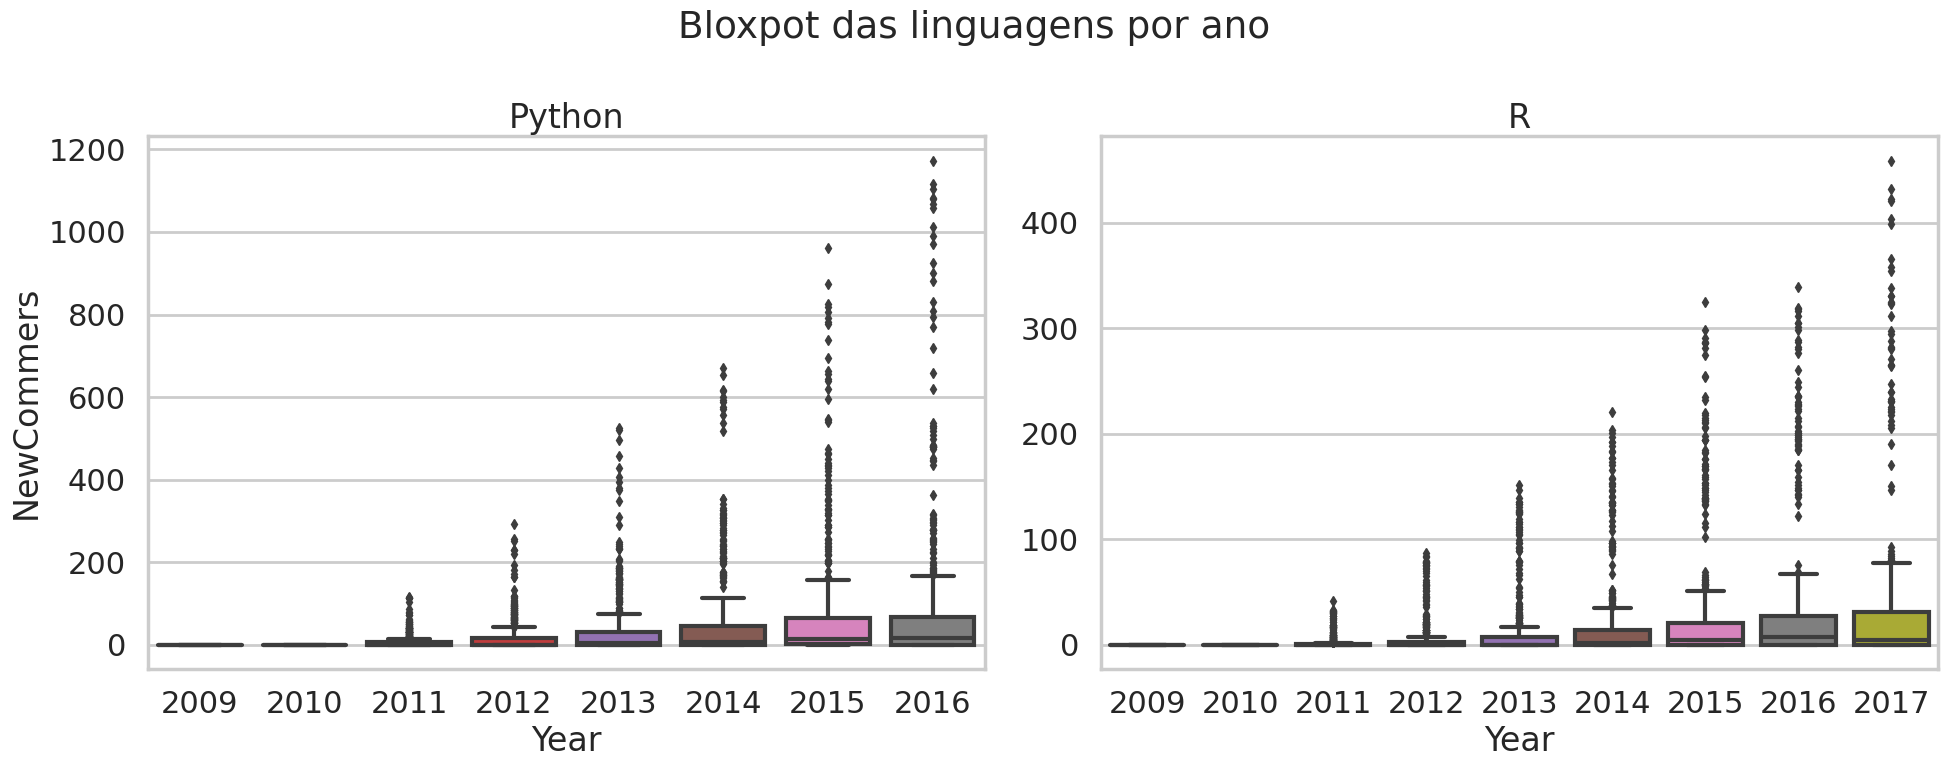

Hipotese nula rejeitada...
p:  4.231328838629008e-13
d:  0.24829889598040317 
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



In [143]:
sns.reset_orig()

sns.set_style("whitegrid")
sns.set_context("poster")

fig, axs = plt.subplots(1, 2)
fig.suptitle("Bloxpot das linguagens por ano", fontsize=27)
fig.set_figwidth(20)
fig.set_figheight(8)

axs[0].set_title('Python')
axs[1].set_title('R')
sns.boxplot(data=dataAllPython, y='NewCommers', x='Year', ax=axs[0])
sns.boxplot(data=dataAllR, y='NewCommers', x='Year', ax=axs[1])

axs[1].set_ylabel('')

fig.tight_layout()
plt.show()

U1, p = mannwhitneyu(dataAllPython['NewCommers'].values.tolist(), dataAllR['NewCommers'].values.tolist())

def cohend(d1, d2):
	n1, n2 = len(d1), len(d2)
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	u1, u2 = np.mean(d1), np.mean(d2)
	return (u1 - u2) / s


if p < 0.05:
    print('Hipotese nula rejeitada...\np: ', p)
    d = cohend(dataAllPython['NewCommers'].values.tolist(), dataAllR['NewCommers'].values.tolist())

    text = ''
    if d < 0.20:
            text = 'trivial'
    elif d >= 0.20 and d < 0.50:
        text = 'pouco significativo'
    elif d >= 0.50 and d < 0.80:
        text = 'medio significativo'
    elif d >= 0.80:
        text = 'bastante significativo'

    print('d: ', d, '\nPelo valor de "d", temos que a diferença dos conjuntos é', text, end='\n\n')

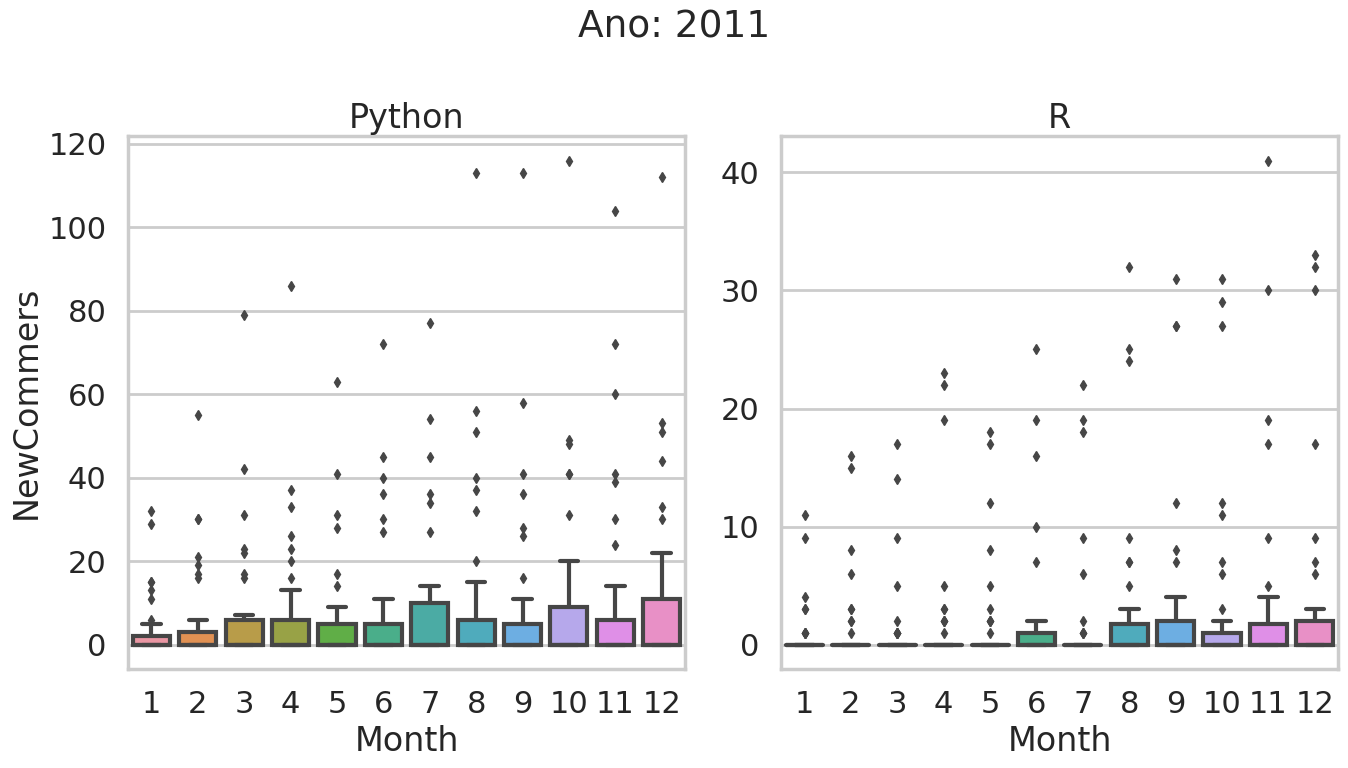

Hipotese nula rejeitada para o ano de 2011...
p: 4.231328838629008e-13
d: 0.4236891938509868
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



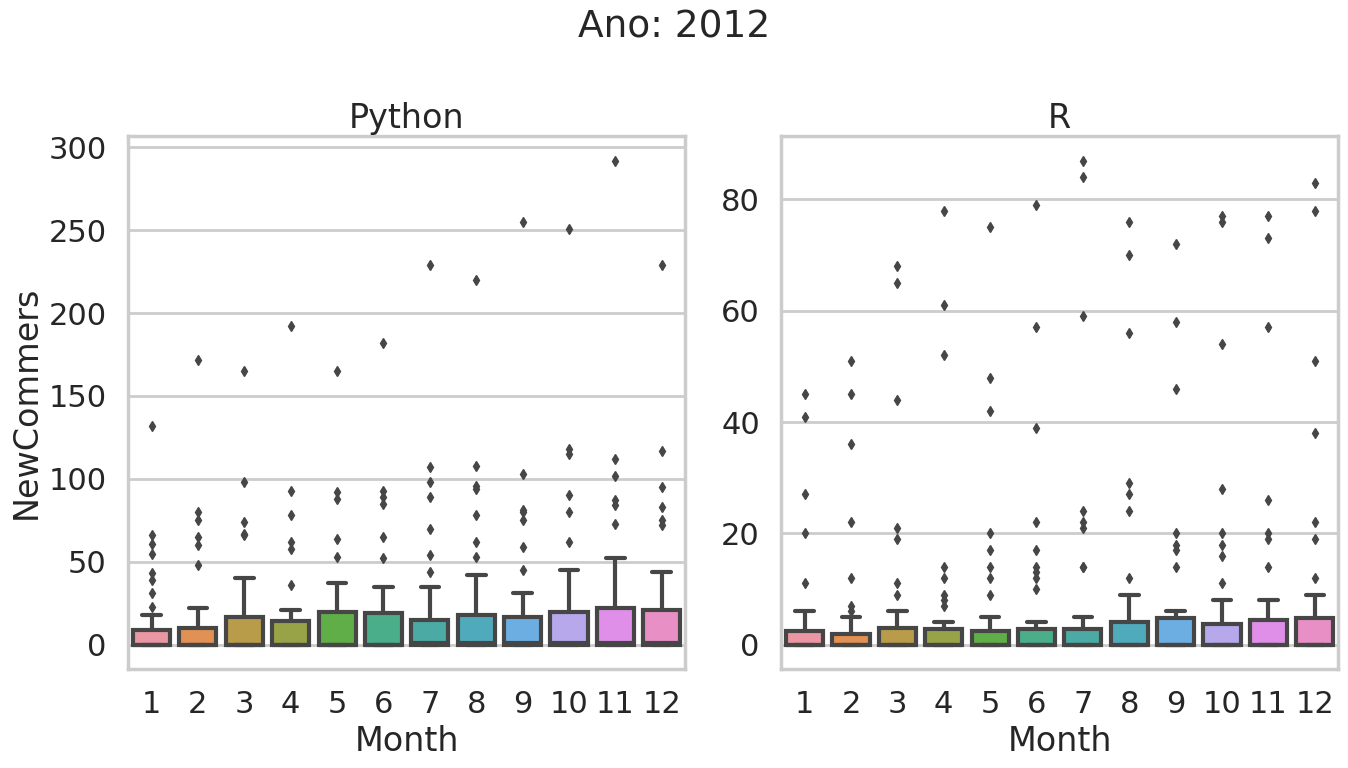

Hipotese nula rejeitada para o ano de 2012...
p: 4.231328838629008e-13
d: 0.39636632055501714
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



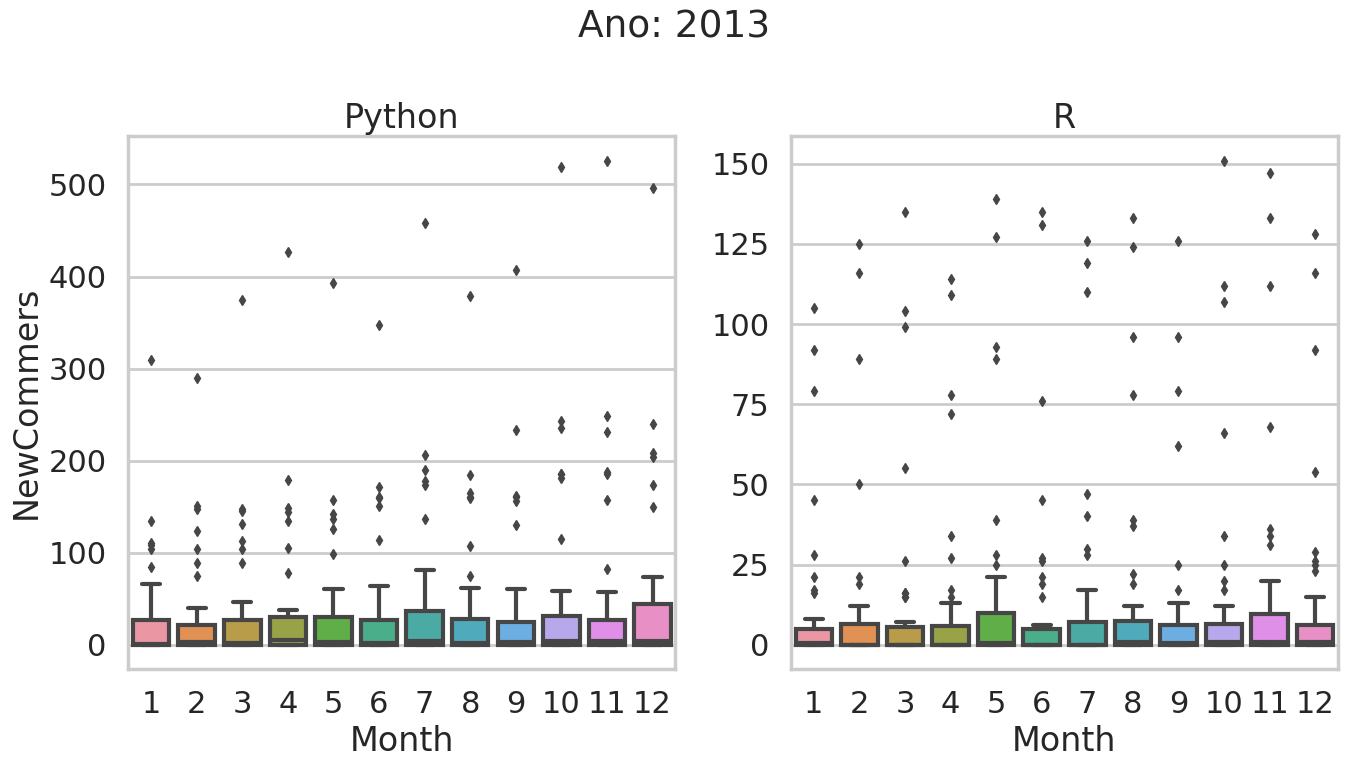

Hipotese nula rejeitada para o ano de 2013...
p: 4.231328838629008e-13
d: 0.4100675126227774
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



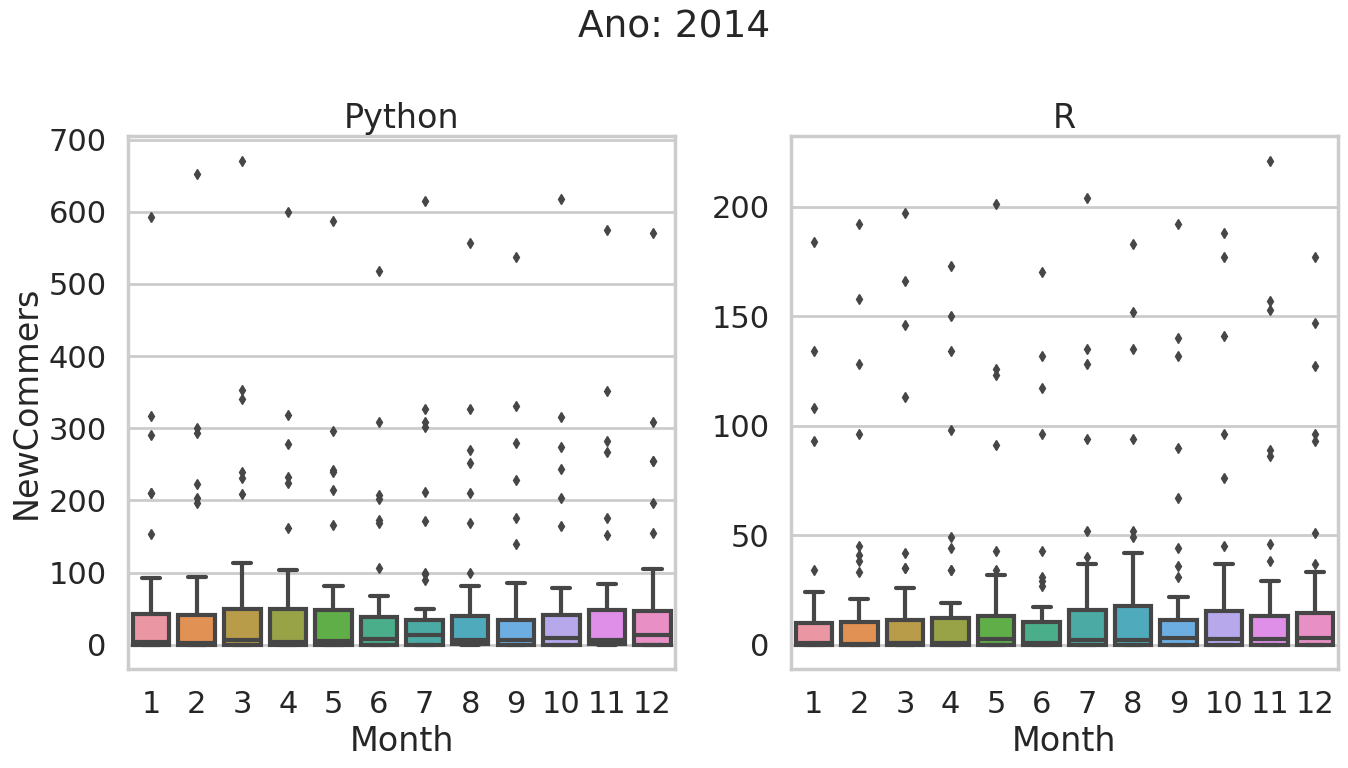

Hipotese nula rejeitada para o ano de 2014...
p: 4.231328838629008e-13
d: 0.4239858596333384
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



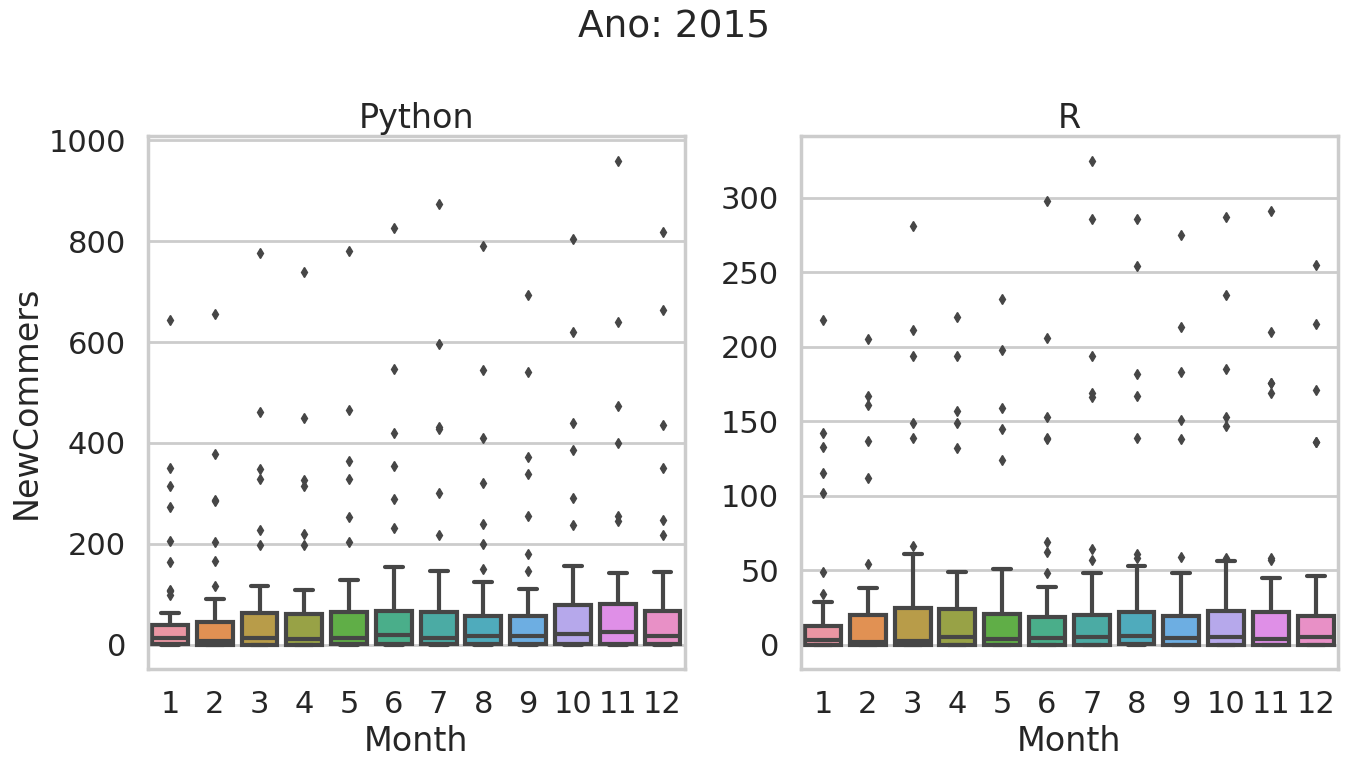

Hipotese nula rejeitada para o ano de 2015...
p: 4.231328838629008e-13
d: 0.4102676973953074
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



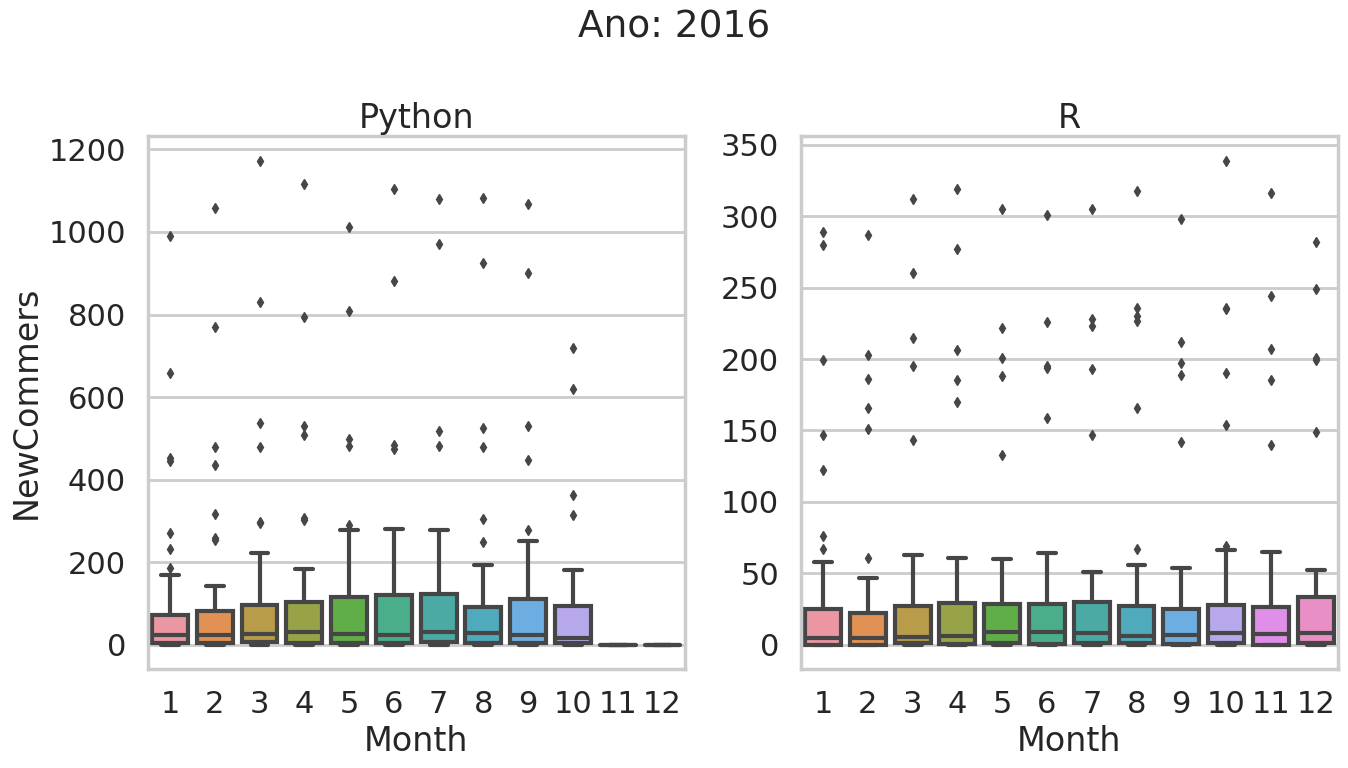

Hipotese nula rejeitada para o ano de 2016...
p: 4.231328838629008e-13
d: 0.3762556975931186
Pelo valor de "d", temos que a diferença dos conjuntos é pouco significativo



In [136]:
# anoNot = set(dataAllR['Year'].unique().tolist()) ^ set(dataAllPython['Year'].unique().tolist())
anoNot = [2017, 2009, 2010]

for ano in data['Year'].unique().tolist():
    
    if ano not in anoNot:
        
        fig, axs = plt.subplots(1, 2)
        fig.suptitle("Ano: " + str(ano), fontsize=27)
        fig.set_figwidth(14)
        fig.set_figheight(8)
      
        dataYearPython = dataAllPython.loc[dataAllPython['Year'] == ano]
        dataYearR = dataAllR.loc[dataAllR['Year'] == ano]
        
        axs[0].set_title('Python')
        axs[1].set_title('R')
        sns.boxplot(data=dataYearPython, y='NewCommers', x='Month', ax=axs[0])
        sns.boxplot(data=dataYearR, y='NewCommers', x='Month', ax=axs[1])

        axs[1].set_ylabel('')

        fig.tight_layout()
        plt.show()

        U1, p = mannwhitneyu(dataAllPython['NewCommers'].values.tolist(), dataAllR['NewCommers'].values.tolist())

        if p < 0.05:
            print(f'Hipotese nula rejeitada para o ano de {ano}...\np: {p}')
            d = cohend(dataYearPython['NewCommers'].values.tolist(), dataYearR['NewCommers'].values.tolist())

            text = ''
            if d < 0.20:
                    text = 'trivial'
            elif d >= 0.20 and d < 0.50:
                text = 'pouco significativo'
            elif d >= 0.50 and d < 0.80:
                text = 'medio significativo'
            elif d >= 0.80:
                text = 'bastante significativo'

            print(f'd: {d}\nPelo valor de "d", temos que a diferença dos conjuntos é {text}', end='\n\n')

        else:
            print(f'Hipotese nula não rejeitada para o ano de {ano}...\np: {p}!\n\n')